In [0]:
'''
Airfoil
tran ( train csv)
test(csv)
'''
root_folder = '/content/drive/My Drive/Colab Notebooks/SMAI/2019201089-Assignment 2/'

train_data_path  = root_folder + 'Datasets/Question-3/airfoil.csv'
data_description = root_folder + 'Datasets/Question-3/description.txt'

In [0]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

os.chdir(root_folder)

In [0]:
!ls -l 

total 420
drwx------ 8 root root   4096 Feb 25 09:59  Datasets
-rw------- 1 root root  36791 Mar  2 13:05  initial_q1_cfar10.ipynb
-rw------- 1 root root 145042 Mar  2 16:29  q3_linear_regression.ipynb
-rw------- 1 root root 125560 Mar  2 16:28 'q4_ linear_regression.ipynb'
-rw------- 1 root root  53674 Feb 25 09:59  SMAI_A2.pdf
-rw------- 1 root root   5375 Feb 28 09:48  svm_q5.ipynb
-rw------- 1 root root    704 Feb 27 18:59  test56.py
-rw------- 1 root root   1402 Feb 25 09:59  test.py
-rw------- 1 root root  46245 Mar  2 16:24  train.csv
-rw------- 1 root root   8794 Mar  2 16:24  val.csv


####Data Description

In [0]:
with open(data_description,'r') as describe:
    print(describe.read())

1. Title: airfoil.csv (NASA data set, obtained from a series of aerodynamic and acoustictests of two and three-dimensional airfoil blade sections)

2. Number of Instances: 1202

3. Number of Attributes: 5 + output variable

4. Attribute Information:
	
	1. Frequency, in Hertzs.
	2. Angle of attack, in degrees.
	3. Chord length, in meters.
	4. Free-stream velocity, in meters per second.
	5. Suction side displacement thickness, in meters.
	6. Scaled sound pressure level, in decibels.

5. Missing Attribute Values: None



In [0]:
df = pd.read_csv(train_data_path, names=['freq', 'angle', 'chord_length', 'free_stream_velocity', 'suction_side_displacement', 'sound_pressure'])

In [0]:
df.describe()

freq        angle  ...  suction_side_displacement  sound_pressure
count   1202.000000  1202.000000  ...                1202.000000     1202.000000
mean    2938.061564     6.657654  ...                   0.010967      124.726941
std     3180.433353     5.800597  ...                   0.013082        6.968144
min      200.000000     0.000000  ...                   0.000401      103.380000
25%      800.000000     2.000000  ...                   0.002535      120.100000
50%     1600.000000     5.300000  ...                   0.004957      125.726500
75%     4000.000000     9.900000  ...                   0.014072      129.936250
max    20000.000000    22.200000  ...                   0.058411      140.987000

[8 rows x 6 columns]

In [0]:
df.head(20)

freq  angle  ...  suction_side_displacement  sound_pressure
0   8000.0    4.0  ...                   0.004738         113.129
1   6300.0    0.0  ...                   0.000762         132.796
2    400.0    4.0  ...                   0.004286         123.274
3   1250.0   15.4  ...                   0.028259         126.743
4    800.0    7.3  ...                   0.012348         126.299
5    500.0   12.7  ...                   0.012181         126.898
6   6300.0   22.2  ...                   0.021418         123.127
7   4000.0   15.6  ...                   0.043726         113.298
8    800.0    9.9  ...                   0.023333         126.345
9   4000.0    7.3  ...                   0.013267         112.639
10  2000.0   12.6  ...                   0.048316         117.504
11   315.0   15.4  ...                   0.028985         122.845
12   630.0    2.0  ...                   0.003724         129.057
13  1000.0    9.5  ...                   0.004207         129.556
14   800.0    1.5  ...                   0.003921         128.831
15  4000.0    4.0  ...                   0.004978         119.535
16   250.0    8.9  ...                   0.010309         134.533
17  3150.0   22.2  ...                   0.022903         120.856
18  1600.0    0.0  ...                   0.001320         132.050
19   315.0    3.0  ...                   0.005295         123.118

[20 rows x 6 columns]

In [0]:
df.shape

(1202, 6)

Cost is defined as 
$MSE = 1/2N(\sum(y_i - W^TX)^2$
vectorize 


$ gradrient =  -X(TARGETS - PREDICTIONS)$


In [0]:
class Airfoil():

    def __init__(self, alpha=0.01, cost_function_type='mse', epochs=500, random_weights=False):
        '''set defaults '''

        '''
        data frame has train data
        weights are for line/hyper plane
        alpha for learning rate
        target for y_actual
        bias
        features_count for number of features
        N is total number of inputs
        '''

        self.data_frame = self.weights = None
        self.features = None
        self.target = None
        self.N = 0

        self.cost_function_type = 'mse'
        self.alpha = alpha
        self.epochs = epochs
        self.random_weights = random_weights
        self.cost_history = []

        self.initial_weights = None

    def feature_normalize(self, features):
        '''
        min max feature scaling
        goal to bring value to the range -1 to 1
        deal with bias term min == max for it deal with it
        '''
        for feature in features.T:
            feature_mean , feature_range = np.mean(feature), np.amax(feature) - np.amin(feature)

            feature -= feature_mean
            feature /= feature_range
        return features
    

    def cost_function_J(self):
        '''sum of euclidian distance between predicted to target values'''

        if self.cost_function_type == 'mse':
            # print('''cost_Finction_j\n\n\n''')
            # print(self._predict(self.features))
            # input()
            return np.sum(np.power(np.array(self._predict(self.features) - self.target), 2))/(1.0 * 2 * self.N)
        else:
            pass

    def gradient_descent(self):
        prediction_error = self.target - self._predict(self.features)
        # print(self.features.T.shape, prediction_error.shape)
        gradients = np.dot(-self.features.T, prediction_error) / self.N

        # print(gradients.shape)
        self.weights -= self.alpha * gradients

        return


    def initialize_weights(self):
        '''
        initialize weights
        '''
        if self.random_weights:
            self.weights = np.random.ranf(size =(self.features_count, 1)) + np.random.randint(low=-200,high=100)
        else:
            self.weights = np.zeros(shape=(self.features_count, 1)) # sub 1 for target does not need weight
        print('Initial Weigths ', ' '.join([str(i) for i in self.weights]))
        import copy
        self.initial_weights = copy.deepcopy(self.weights)

    def add_bias_term(self):
        bias = np.ones(shape=(self.features.T[0].shape[0], 1))
        self.features = np.append( self.features, bias, axis=1)
        # print(self.features)
    
    def _predict(self, features):
        # print(self.features)
        # print(self.weights)
        return np.dot(features,self.weights)

    def model_setup(self, data_frame):
        self.features = np.array(data_frame)
        self.target = self.features.T[-1][:].reshape(-1,1)
        self.features = self.features.T[:-1].T[:]
        '''
        min-max scaling
        '''
        self.features = self.feature_normalize(self.features)

        '''
        we are taking bias inside the weight vector so we add bias to features count
        '''
        self.add_bias_term()

        self.N, self.features_count = self.features.shape[0], self.features.shape[1]
        self.initialize_weights()



    def train(self, train_data_path='Datasets/Question-3/airfoil.csv'):
        data_frame = None
        try:
            data_frame = pd.read_csv(train_data_path, names=['freq', 'angle', 'chord_length', 'free_stream_velocity', 'suction_side_displacement', 'sound_pressure'])
        except:
            print('No such file found')
            exit(-1)
        
        '''
        setup phase
        '''
        self.model_setup(data_frame)
        
        for i in range(self.epochs):
            self.gradient_descent()
            self.cost_history.append(self.cost_function_J())
            if i%(self.epochs/10)==0:
                print(i, ' epoch cost ',self.cost_history[-1], 'weights ', ' '.join((str(i) for i in self.weights)))
    
        return self.cost_history, self.weights

    def predict(self, test_data_path = 'Datasets/Question-3/airfoil.csv'):
        self.test_x = pd.read_csv(test_data_path,header=None).values
        self.test_x = self.feature_normalize(self.test_x)
        print(self.test_x.shape)
        bias = np.ones(shape=(self.test_x.T[0].shape[0], 1))
        self.test_x = np.append( self.test_x, bias, axis=1)
        print(self.test_x.shape)
        return self._predict(self.test_x)



In [0]:
data_frame = pd.read_csv('./Datasets/Question-3/airfoil.csv',header=None)
from sklearn.utils import shuffle
data_frame = shuffle(data_frame)
val=int(-data_frame.shape[0]*0.21)
output=data_frame.iloc[val:][5]
val_csv = data_frame.iloc[val:].drop([5], axis=1)
val_csv.to_csv('val.csv',header=None,index=False)
data_frame.iloc[:data_frame.shape[0]+val].to_csv('train.csv')


In [0]:
model3 = Airfoil(epochs=1000)
cost_history_alpha1 = model3.train('train.csv') # Path to the train.csv will be provided

# prediction3 should be Python 1-D List
# '''WE WILL CHECK THE MEAN SQUARED ERROR OF PREDICTIONS WITH'''

Initial Weigths  [0.] [0.] [0.] [0.] [0.] [0.]
0  epoch cost  7646.029134763928 weights  [-0.00438066] [-0.00222979] [-0.00199812] [0.00321573] [-0.00132131] [1.24647267]
100  epoch cost  1051.8628593983499 weights  [-0.43895526] [-0.22142775] [-0.20208907] [0.31760302] [-0.13318654] [79.47858539]
200  epoch cost  168.0555961790047 weights  [-0.86663584] [-0.43338054] [-0.4027052] [0.61821767] [-0.26453255] [108.11406877]
300  epoch cost  49.33438637161696 weights  [-1.2874562] [-0.63843388] [-0.60380613] [0.90571637] [-0.39537003] [118.5955818]
400  epoch cost  33.132289884644464 weights  [-1.7014557] [-0.83691388] [-0.80535345] [1.18072319] [-0.52570907] [122.43215455]
500  epoch cost  30.677994722599934 weights  [-2.10867881] [-1.02912823] [-1.00731054] [1.44383131] [-0.65555929] [123.83646426]
600  epoch cost  30.07720264570566 weights  [-2.50917461] [-1.21536738] [-1.20964248] [1.6956045] [-0.78492977] [124.35048703]
700  epoch cost  29.73562925223296 weights  [-2.90299645] [-1.39

In [0]:

prediction3 = model3.predict('val.csv') # Path to the test.csv will be provided


(252, 5)
(252, 6)


In [0]:
print(prediction3.reshape(-1).__len__())
print(output.values.__len__())
from sklearn.metrics import mean_squared_error
mean_squared_error(prediction3.reshape(-1), output.values)

252
252


37.708143620199756

##COST VS Epoch

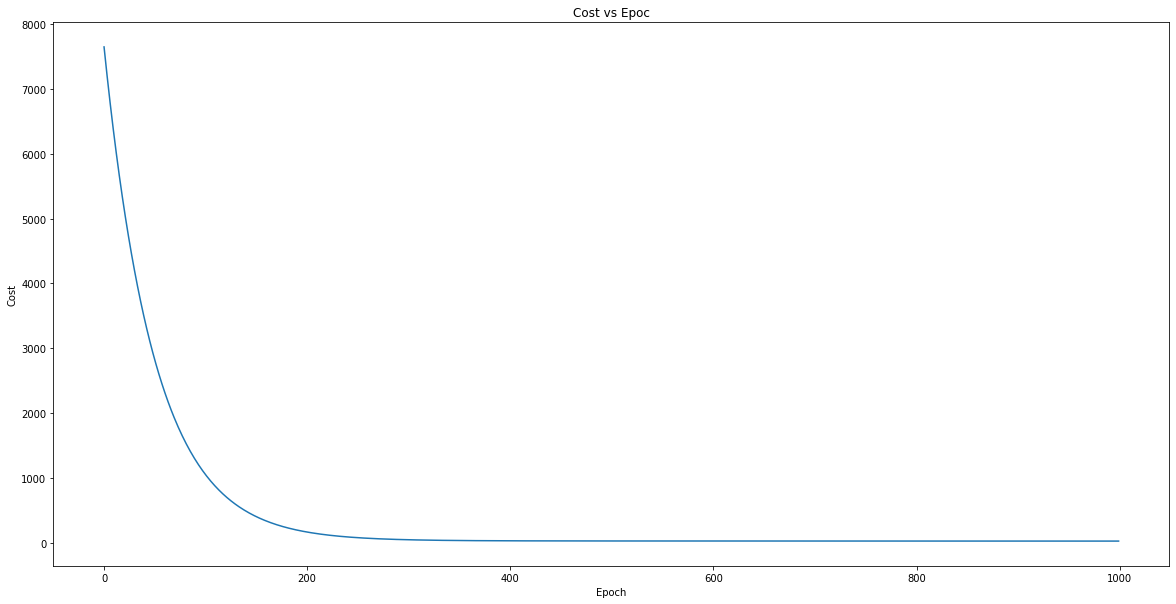

In [0]:
plt.plot(list(range(1000)), cost_history_alpha1[0])
plt.title('Cost vs Epoc')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [0]:
model3 = Airfoil(epochs=1000, alpha=0.1)
cost_history_alpha2 = model3.train('./Datasets/Question-3/airfoil.csv') # Path to the train.csv will be provided

Initial Weigths  [0.] [0.] [0.] [0.] [0.] [0.]
0  epoch cost  6324.669748764983 weights  [-0.04648101] [-0.02524187] [-0.0568136] [0.03600174] [-0.04754265] [12.47269409]
100  epoch cost  18.196851261484532 weights  [-4.49767562] [-2.18575269] [-4.01661421] [2.02212158] [-3.80233661] [124.7239593]
200  epoch cost  15.483590905470587 weights  [-8.39954028] [-3.62408603] [-6.01280985] [2.67364414] [-6.06985777] [124.72694085]
300  epoch cost  13.983844365424835 weights  [-11.68522582] [-4.56748713] [-7.11846829] [2.99336097] [-7.44613693] [124.72694093]
400  epoch cost  13.081986979074944 weights  [-14.39505466] [-5.22100694] [-7.77922517] [3.20456655] [-8.29931921] [124.72694093]
500  epoch cost  12.518704056072943 weights  [-16.60421702] [-5.70694018] [-8.20356965] [3.36352147] [-8.83870438] [124.72694093]
600  epoch cost  12.16069831468328 weights  [-18.39335722] [-6.09187065] [-8.49553785] [3.48877789] [-9.18283067] [124.72694093]
700  epoch cost  11.931068330824761 weights  [-19.836

In [0]:
model3 = Airfoil(epochs=1000, alpha=1)
cost_history_alpha3 = model3.train('./Datasets/Question-3/airfoil.csv') # Path to the train.csv will be provided

Initial Weigths  [0.] [0.] [0.] [0.] [0.] [0.]
0  epoch cost  23.327597939225388 weights  [-0.4648101] [-0.25241867] [-0.56813604] [0.36001738] [-0.47542654] [124.72694093]
100  epoch cost  11.61476401677385 weights  [-22.81273284] [-7.16444233] [-9.12841725] [3.79848511] [-9.6577784] [124.72694093]
200  epoch cost  11.498786918816382 weights  [-25.48418075] [-8.35381632] [-9.61195091] [4.00662499] [-9.3032873] [124.72694093]
300  epoch cost  11.494368391792944 weights  [-25.82946677] [-8.75555743] [-9.73962323] [4.04368815] [-9.00275585] [124.72694093]
400  epoch cost  11.493948947183245 weights  [-25.8904346] [-8.89181343] [-9.77945926] [4.0529121] [-8.88287207] [124.72694093]
500  epoch cost  11.493901531720033 weights  [-25.90550172] [-8.93804735] [-9.79262942] [4.05570692] [-8.84039629] [124.72694093]
600  epoch cost  11.493896079438757 weights  [-25.91005252] [-8.95373735] [-9.79706416] [4.05662185] [-8.82580183] [124.72694093]
700  epoch cost  11.493895451542537 weights  [-25.91

##CONVERGENCE WITH 3 different alphas

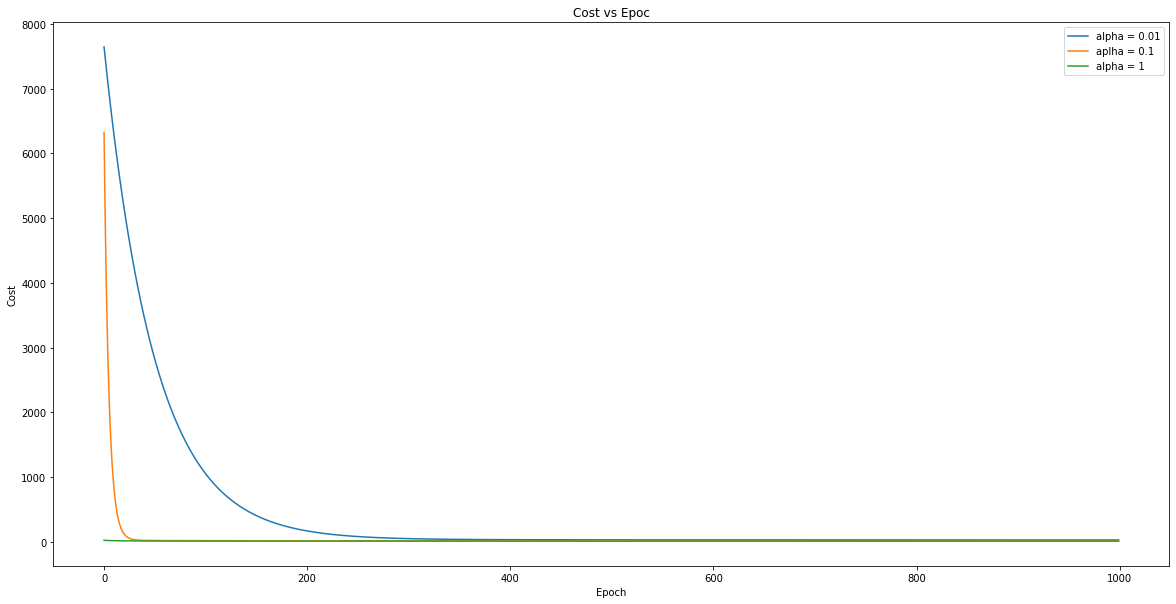

In [0]:
plt.plot(list(range(1000)), cost_history_alpha1[0])
plt.plot(list(range(1000)), cost_history_alpha2[0])
plt.plot(list(range(1000)), cost_history_alpha3[0])

plt.legend(('alpha = 0.01', 'aplha = 0.1', 'alpha = 1'),
           loc='upper right')
plt.title('Cost vs Epoc')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Random Initail Values

In [0]:
model3 = Airfoil(epochs=10000, random_weights=True)
cost_history_wt1 = model3.train('./Datasets/Question-3/airfoil.csv') # Path to the train.csv will be provided
intital_wt1 = 'wt1 '+str(' '.join('{0:.2f}'.format(i[0]) for i in model3.initial_weights[:]))

Initial Weigths  [-163.91988733] [-163.7007066] [-163.36811457] [-163.52020142] [-163.4936585] [-163.61631232]
0  epoch cost  45488.1725077545 weights  [-163.90134234] [-163.60002489] [-163.28581247] [-163.24049374] [-163.38229166] [-160.73287979]
1000  epoch cost  800.4637013207706 weights  [-146.56681448] [-97.06593904] [-98.00596241] [-22.80019516] [-84.98274714] [124.71461728]
2000  epoch cost  280.67480957250734 weights  [-129.36822896] [-66.57472714] [-61.10098334] [5.06225817] [-45.90134853] [124.7269404]
3000  epoch cost  139.81781064524077 weights  [-112.74125451] [-50.612501] [-41.19993338] [9.58131696] [-25.40242269] [124.72694093]
4000  epoch cost  83.93537712883762 weights  [-97.72574945] [-41.42031947] [-30.37963119] [9.5004481] [-14.34006112] [124.72694093]
5000  epoch cost  56.097305491965614 weights  [-84.78187773] [-35.64429615] [-24.29220649] [8.68540864] [-8.2644077] [124.72694093]
6000  epoch cost  40.1607738605924 weights  [-73.93251569] [-31.6853016] [-20.6853381

In [0]:
model3 = Airfoil(epochs=10000, random_weights=True)
cost_history_wt2 = model3.train('./Datasets/Question-3/airfoil.csv') # Path to the train.csv will be provided
intital_wt2 = 'wt2 ' + str(' '.join('{0:.2f}'.format(i[0]) for i in model3.initial_weights[:]))

Initial Weigths  [-0.97340235] [-0.77072944] [-0.47510746] [-0.47139942] [-0.73359538] [-0.14100517]
0  epoch cost  7664.084668539018 weights  [-0.97790825] [-0.77269304] [-0.48070949] [-0.46694517] [-0.73778959] [1.10767429]
1000  epoch cost  17.638332850154384 weights  [-5.28770796] [-2.59011406] [-4.32610757] [1.96065941] [-4.12613859] [124.72160413]
2000  epoch cost  15.16726529049434 weights  [-9.05539533] [-3.89234441] [-6.21400201] [2.69805059] [-6.22562459] [124.7269407]
3000  epoch cost  13.79257324709866 weights  [-12.22213334] [-4.76923972] [-7.25180729] [3.02880612] [-7.51580809] [124.72694093]
4000  epoch cost  12.96187120221384 weights  [-14.83094848] [-5.38444463] [-7.87284574] [3.23657036] [-8.32181038] [124.72694093]
5000  epoch cost  12.44181342196081 weights  [-16.9564856] [-5.84525321] [-8.27349289] [3.39022435] [-8.83427414] [124.72694093]
6000  epoch cost  12.110904172672864 weights  [-18.67742036] [-6.21192727] [-8.55051766] [3.51072967] [-9.16273391] [124.726940

In [0]:
model3 = Airfoil(epochs=10000, random_weights=True)
cost_history_wt3 = model3.train('./Datasets/Question-3/airfoil.csv') # Path to the train.csv will be provided
intital_wt3 = 'wt3 ' + str(' '.join('{0:.2f}'.format(i[0]) for i in model3.initial_weights[:]))

Initial Weigths  [79.64057504] [79.56549875] [79.65173967] [79.86929746] [79.12977437] [79.56937581]
0  epoch cost  2308.358874092015 weights  [79.62460649] [79.51304366] [79.60295113] [79.73809725] [79.0687878] [80.02095146]
1000  epoch cost  291.99546470819536 weights  [64.56600319] [44.07180493] [41.78922887] [14.1485898] [35.48937635] [124.72501092]
2000  epoch cost  125.61095710890585 weights  [50.41211113] [27.12236655] [20.83153251] [1.51886136] [13.15669519] [124.72694085]
3000  epoch cost  71.66329503039998 weights  [37.4535021] [17.94988111] [9.49661634] [-0.21312013] [1.16337434] [124.72694093]
4000  epoch cost  47.24048637092412 weights  [26.13206059] [12.49630549] [3.2459201] [0.13835584] [-5.47000803] [124.72694093]
5000  epoch cost  33.98199285945607 weights  [16.55960703] [8.95338439] [-0.34969415] [0.77079466] [-9.21453693] [124.72694093]
6000  epoch cost  26.04859704894647 weights  [8.62791002] [6.44537013] [-2.54127766] [1.34523843] [-11.34879639] [124.72694093]
7000

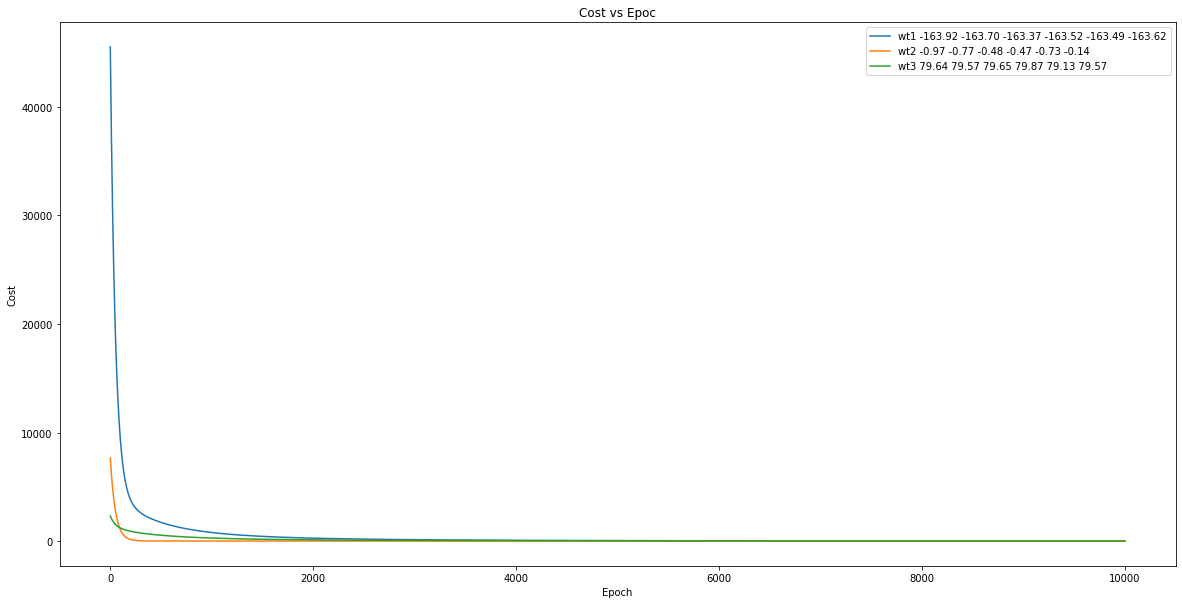

In [0]:
plt.plot(list(range(10000)), cost_history_wt1[0])
plt.plot(list(range(10000)), cost_history_wt2[0])
plt.plot(list(range(10000)), cost_history_wt3[0])

plt.legend((intital_wt1, intital_wt2, intital_wt3),
           loc='upper right')
plt.title('Cost vs Epoc')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

###Handling Missing Values

We can not surely say unless we see what that features is;
Say the data is **Systematic** and there are missing values there might be a reason why its missing.
Else if the data is missing at **random** it might be broken process/sensor.

These 2 are 2 different polarities and needs to be handled seperately.

Say data is systematic and we have **60%** + missing data that means it has some contributions towards the label-y / output. Simply droping the column might cost us big time.
Some times fill with zero might be wrong idea per say, 
For example feature like months since last delinquency in loan data. It’s somewhere around 65% missing. This feature is measuring how long it has been since a loan applicant had a delinquent account, which on the surface seems really important, but a lot of candidates end up dropping it! Thinking back to random vs systematic missing values, where would you guess this one falls? This is very likely a feature with systematic missing values — it is missing because it does not apply, or put more clearly, they haven’t had a delinquent account. Here are some treatments I’ve seen applied to this (and all other) features:

*Fill with 0* — this tells our algorithm it has been 0 months since their last delinquency (meaning it happened basically yesterday). This gives our algorithm a ton of incorrect information and noise

*Fill with median* makes more sense here

If the data with missing values is too low say **0.5-1%** and dataset is sufficently large we can drop them assuming them as outlier, but i would be better if we analyse and fill with some sensible values

If the data missing is say **10-20%** we should try techniques like linear regression to predict the values and correlate with the rest of features and train values.